In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/StudentsPerformance.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/student-performance/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

# Chacking Missing Values.

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Check the Duplicate Values.

In [7]:
df.duplicated().sum()

0

# Check the data type and other information of the each column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Exploring each column data (check categorical and numerical columns).

In [9]:
print("Categories in 'Gender' Feature : ", end="")
print(df["gender"].unique())
print("Categories in 'race/ethnicity' Feature : ", end="")
print(df["race/ethnicity"].unique())
print("Categories in 'parental level of education' Feature : ", end="")
print(df["parental level of education"].unique())
print("Categories in 'lunch' Feature : ", end="")
print(df["lunch"].unique())
print("Categories in 'test preparation course' Feature : ", end="")
print(df["test preparation course"].unique())

Categories in 'Gender' Feature : ['female' 'male']
Categories in 'race/ethnicity' Feature : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' Feature : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Feature : ['standard' 'free/reduced']
Categories in 'test preparation course' Feature : ['none' 'completed']


In [10]:
num_features = [feature for feature in df.columns if df[feature].dtype != "object"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "object"]

In [11]:
print(f"Categorical features {len(num_features)} this are: {num_features}")
print(f"Numerical features {len(cat_features)} this are : {cat_features}")

Categorical features 3 this are: ['math score', 'reading score', 'writing score']
Numerical features 5 this are : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


1. 3 Categoical and 5 Numerical column are present in the Dataset.

# Exploring DATA

Check if Gender column make impact on student performance or not.

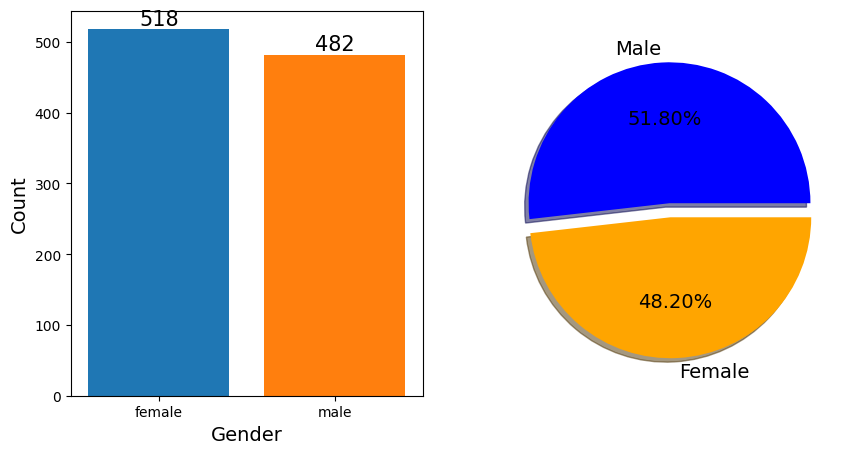

In [12]:
# Create a figure with 2 subplots.
f,ax=plt.subplots(1,2,figsize=(10,5))


# Create a countplot of 'gender' and add labels to bars.
sns.countplot(x=df['gender'],data=df,ax=ax[0],saturation=1)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Create pie chart of  'gender'  and add labels to slices.
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%0.2f%%',shadow=True,colors=['blue','orange'], textprops={'fontsize': 14})

# Display the plot
plt.show()


1.No Such Diffrance between Male & Female.

# Race/Ethnicity column

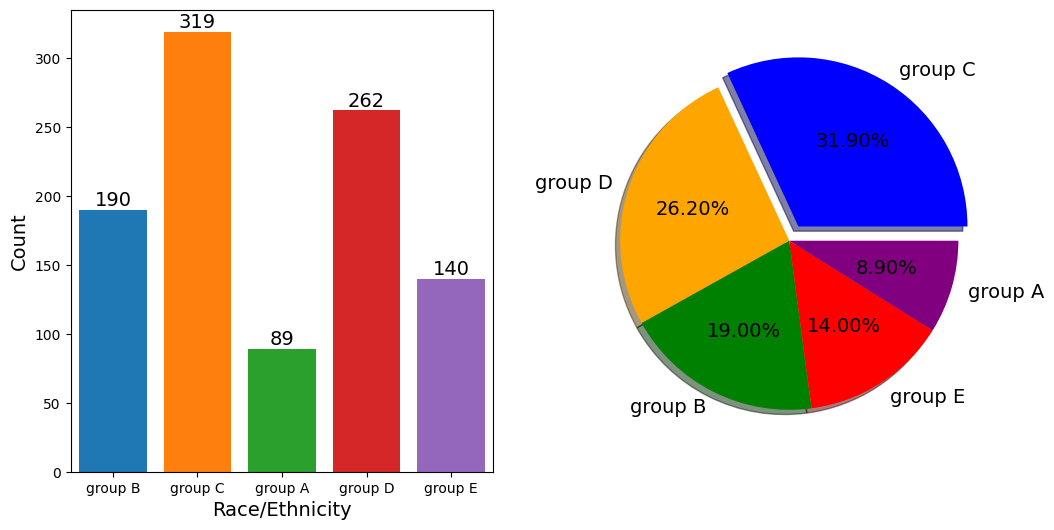

In [13]:
# color for the plots.
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create a figure with 2 subplots.
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity'  and add labels to the bars.
sns.countplot(x=df['race/ethnicity'], data=df, ax=ax[0], saturation=1)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Create a pie chart of the 'race/ethnicity'  and add labels to the slices.
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%.2f%%', shadow=True, colors=colors, textprops={'fontsize': 14})

# Display the plot
plt.show()

1.Most of the student balong from Group C & D.

2.Least student from Group A.

#  Parental Level of Education column.

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


/tmp/ipykernel_36/3366452173.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["parental level of education"], palette = "Blues")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


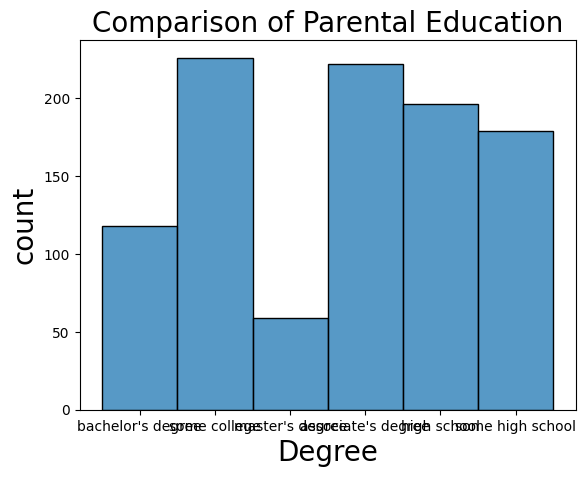

In [15]:

sns.histplot(df["parental level of education"], palette = "Blues")
plt.title("Comparison of Parental Education", fontweight = 30, fontsize = 20)
plt.xlabel("Degree", fontsize = 20)
plt.ylabel("count",fontsize = 20)
plt.show()

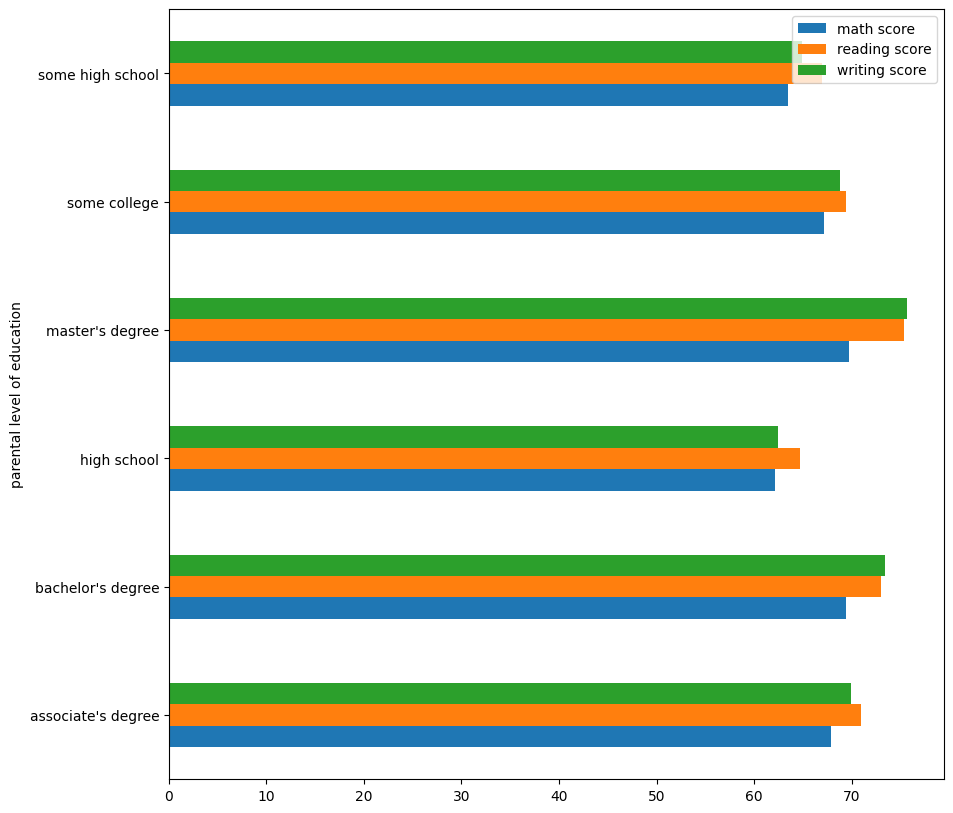

In [16]:
ple = df.groupby("parental level of education").mean(numeric_only = True)
ple.plot(kind="barh",figsize=(10,10))
plt.legend(loc = 1)
plt.show()

# Maximum score of the student in all three subject.

Text(0.5, 1.0, 'Writing Score')

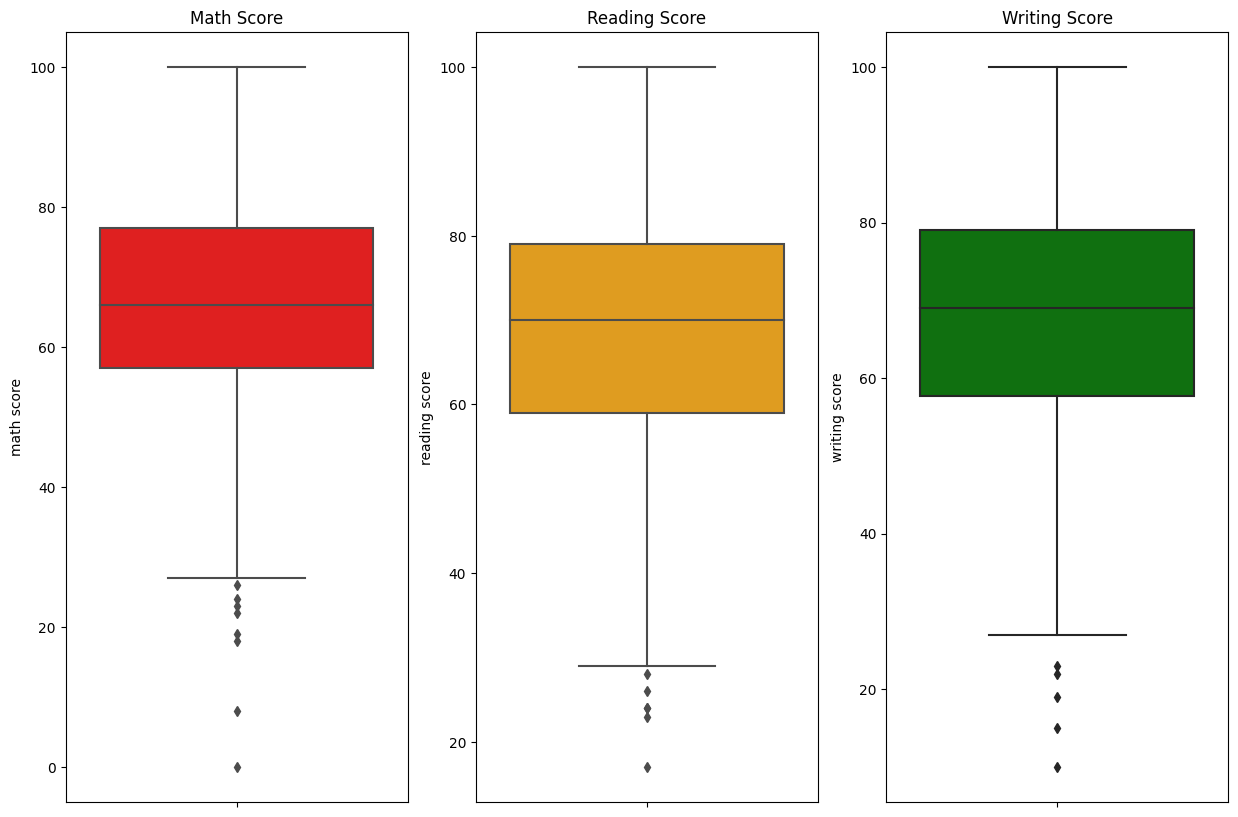

In [17]:
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
sns.boxplot(data = df,y = df["math score"], color = "red", ax= ax[0])
ax[0].set_title("Math Score")
sns.boxplot(data = df,y = df["reading score"], color = "orange", ax=ax[1])
ax[1].set_title("Reading Score")
sns.boxplot(data = df,y = df["writing score"],color = "green", ax= ax[2])
ax[2].set_title("Writing Score")


1. In this 1st box plot show that the most of the student score in Math in the range of the 55 and 70.
2. the 2nd box plot show that most of the student score in reading in range of the 60 and 80.
3. the 3rd box plot show that most of the student score in writing in range of the 55 and 80.

# Multivariate Analysis using pie plot

Text(0.5, 0.98, 'Comparison of Student Attributes')

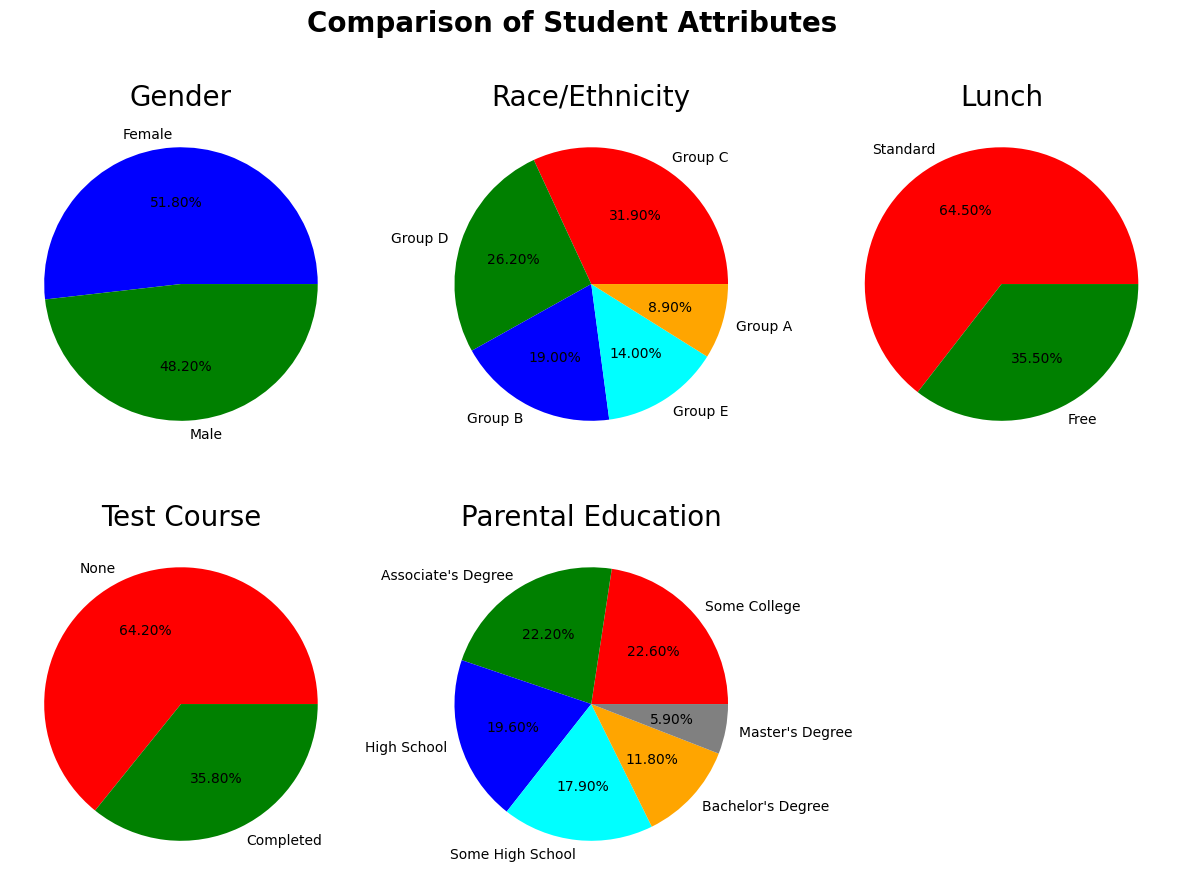

In [18]:
# Set figure size
plt.figure(figsize=(15,10))

# First row of pie charts
plt.subplot(231)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['blue','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(232)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(233)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.suptitle('Comparison of Student Attributes', fontsize=20, fontweight='bold') 

1. Not so much diffrance between in Male and Femle in the dataset.
2. Maximum number of Race/Ethnicity in Group C and D.
3. Student who have standard Lunch is greater.
4. Students who have not enrolled in any test preparation course is greater.
5. Students whose parental education is Some College is greater followed by Associate’s Degree.

Students Performance is related to lunch, race, and parental level education.

1. Student Performance is not much related to test preparation course.
2. The finishing preparation course is beneficial also parental level of education.


# Model Training

In [19]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Adding a new column 'pass_status' to increase model accuracy.

In [20]:
df['pass_status'] = np.where((df['math score'] >= 33) & 
                             (df['reading score'] >= 33) & 
                             (df['writing score'] >= 33), 'Pass', 'Fail')

# Splitting the X and Y Variables

In [21]:
X = df.drop(columns=["math score",'reading score', 'writing score' ],axis=1)
y = df[["math score",'reading score', 'writing score']] 

In [22]:
cat_features = X.columns
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'pass_status'],
      dtype='object')

# Create Column Transformer with 3 Types  of Transformers.

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
# oe_transformer = OrdinalEncoder()

# ColumnTransformer setup with column names.
preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, ["gender"]), 
     ("OrdinalEncoder", oh_transformer, ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','pass_status'])])

# Apply the transformation to the feature set.
X = preprocessor.fit_transform(df)


In [24]:
X.shape

(1000, 19)

# Separate Dataset Using train_test_split

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an Evaluate Function for Best Model Training.

In [26]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Create models variable and form a dictionary formate.

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

In [28]:
model_list = []
r2_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
#     print(model_list)

    print('Model performance for Training set')
    print(" * Root Mean Squared Error: {:.3f}".format(model_train_rmse))
    print(" * Mean Squared Error: {:.3f}".format(model_train_mse))
    print(" * Mean Absolute Error: {:.3f}".format(model_train_mae))
    print(" * R2 Score: {:.3f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print(" * Root Mean Squared Error: {:.3f}".format(model_test_rmse))
    print(" * Mean Squared Error: {:.3f}".format(model_test_rmse))
    print(" * Mean Absolute Error: {:.3f}".format(model_test_mae))
    print(" *  R2 Score: {:.3f}".format(model_train_r2))
    r2_list.append(model_test_r2)

Linear Regression
Model performance for Training set
 * Root Mean Squared Error: 12.026
 * Mean Squared Error: 144.633
 * Mean Absolute Error: 9.839
 * R2 Score: 0.343
----------------------------------
Model performance for Test set
 * Root Mean Squared Error: 11.842
 * Mean Squared Error: 11.842
 * Mean Absolute Error: 9.684
 *  R2 Score: 0.343
K-Neighbors Regressor
Model performance for Training set
 * Root Mean Squared Error: 11.682
 * Mean Squared Error: 136.459
 * Mean Absolute Error: 9.508
 * R2 Score: 0.380
----------------------------------
Model performance for Test set
 * Root Mean Squared Error: 14.284
 * Mean Squared Error: 14.284
 * Mean Absolute Error: 11.406
 *  R2 Score: 0.380
Decision Tree
Model performance for Training set
 * Root Mean Squared Error: 10.641
 * Mean Squared Error: 113.228
 * Mean Absolute Error: 8.383
 * R2 Score: 0.486
----------------------------------
Model performance for Test set
 * Root Mean Squared Error: 12.984
 * Mean Squared Error: 12.984
 *

In [29]:
model_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
model_df

,Model Name,R2_Score
0,Linear Regression,0.407566
2,Decision Tree,0.287851
1,K-Neighbors Regressor,0.138043


# LinearRegrassion

In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 40.76


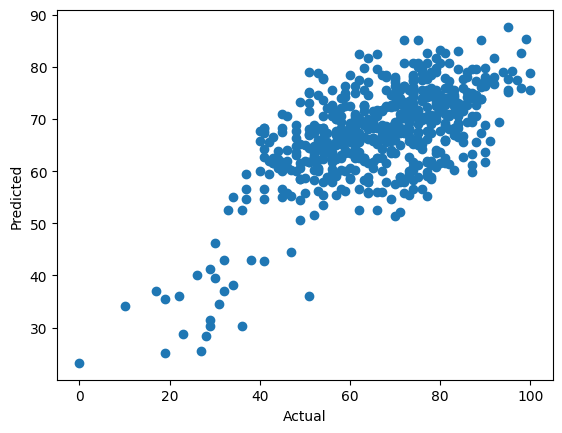

In [31]:
# s_df =pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
# s_df
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
# sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [33]:
pred_df = pd.DataFrame(y_pred, columns=["M_Predicted", "R_Predicted", "W_Predicted"])
test_df = pd.DataFrame(y_test)
cmp_df = pd.concat([pred_df, test_df], axis = 1).dropna()
cmp_df

,M_Predicted,R_Predicted,W_Predicted,math score,reading score,writing score
10,55.00,55.25,50.625,58.0,54.0,52.0
23,52.50,64.25,61.625,69.0,73.0,73.0
25,71.75,67.50,66.125,73.0,74.0,72.0
30,70.25,64.50,62.375,69.0,74.0,74.0
39,23.25,37.00,34.125,57.0,56.0,57.0
44,61.75,61.25,58.875,50.0,56.0,54.0
54,64.00,72.75,70.625,71.0,84.0,87.0
55,68.50,74.50,75.625,33.0,41.0,43.0
59,66.75,76.25,76.625,0.0,17.0,10.0
60,70.50,68.25,66.625,79.0,74.0,72.0


In [34]:
df.head(11)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_status
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass
4,male,group C,some college,standard,none,76,78,75,Pass
5,female,group B,associate's degree,standard,none,71,83,78,Pass
6,female,group B,some college,standard,completed,88,95,92,Pass
7,male,group B,some college,free/reduced,none,40,43,39,Pass
8,male,group D,high school,free/reduced,completed,64,64,67,Pass
9,female,group B,high school,free/reduced,none,38,60,50,Pass


#  Convert the model to pickle file.

In [35]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)
    
# load saved model
with open('model_pkl' , 'rb') as f:
    load = pickle.load(f) 

In [36]:
load

DecisionTreeRegressor()